# Imports, loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# EDA & Cleaning

In [ ]:
# path = "https://drive.google.com/file/d/1flMAEtOtl_5NFHNahjGaMjyTQ_c-TdCH/view?usp=drive_link"
df = pd.read_csv("gdrive/My Drive/BT4012 Project/fake_job_postings.csv")

## Dataset dimensions

In [ ]:
df.head(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [ ]:
df.shape #(total rows, total columns)

(17880, 18)

## Preprocessing by Feature Types (Local)

In [ ]:
target = ['fraudulent']

binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']

numeric_cols = ['salary_range', ]

multiclass_cols = ['location', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']

### Binary columns

<Figure size 640x480 with 0 Axes>

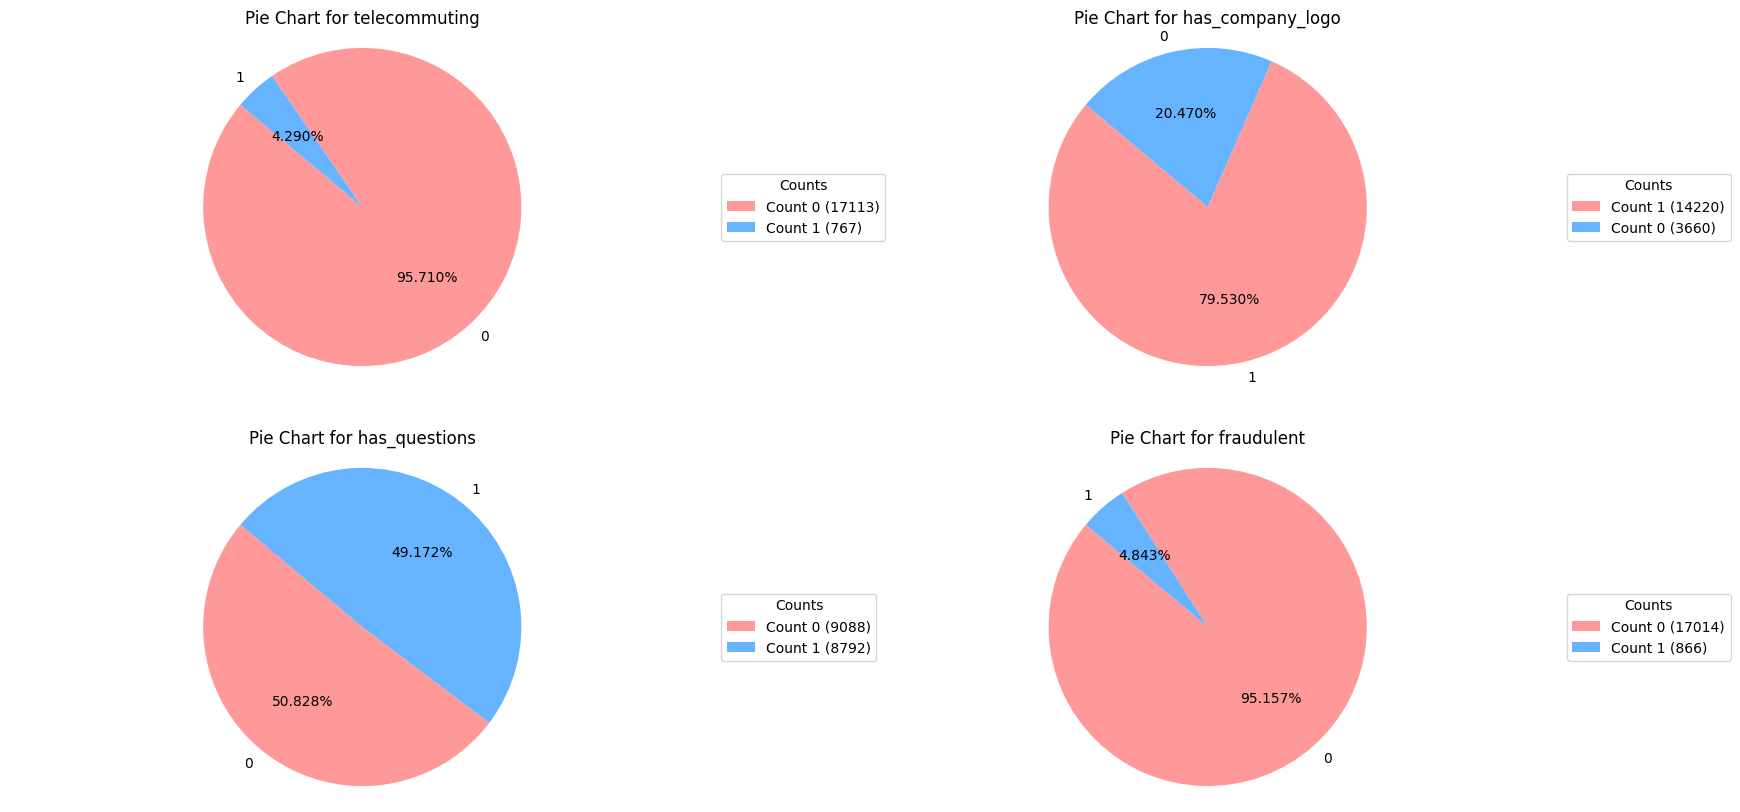

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(binary_cols + target):
    plt.figure(i)

    target = df[col]
    target_value_counts = target.value_counts()
    target_percentages = (target_value_counts / len(target)) * 100

    wedges, texts, autotexts = axes[i].pie(target_percentages, labels=target_percentages.index, autopct='%1.3f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    axes[i].set_title(f'Pie Chart for {col}')
    axes[i].axis('equal')

    labels = [f'Count {val} ({count})' for val, count in zip(target_percentages.index, target_value_counts)]
    axes[i].legend(wedges, labels, title="Counts", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [ ]:
for col in binary_cols:
    cur_col = df[col]
    print(cur_col.value_counts())
    print()

0    17113
1      767
Name: telecommuting, dtype: int64

1    14220
0     3660
Name: has_company_logo, dtype: int64

0    9088
1    8792
Name: has_questions, dtype: int64



Correlation Matrix

In [ ]:
df[binary_cols].corr()

,telecommuting,has_company_logo,has_questions
telecommuting,1.000000,-0.019836,0.020345
has_company_logo,-0.019836,1.000000,0.233932
has_questions,0.020345,0.233932,1.000000


Covariance Matrix

In [ ]:
df[binary_cols].cov()

,telecommuting,has_company_logo,has_questions
telecommuting,0.041059,-0.001622,0.002061
has_company_logo,-0.001622,0.162806,0.047190
has_questions,0.002061,0.047190,0.249945


### Numeric columns

In [ ]:
df[numeric_cols].value_counts()

salary_range
0-0             142
40000-50000      66
30000-40000      55
25000-30000      37
45000-67000      37
               ... 
36000-63000       1
36000-60000       1
36000-54000       1
36000-52000       1
16000-22000       1
Length: 874, dtype: int64

In [ ]:
#processing
df[['minimum_salary', 'maximum_salary']] = df['salary_range'].str.split('-', expand=True)

df['minimum_salary'] = pd.to_numeric(df['minimum_salary'], errors='coerce')
df['maximum_salary'] = pd.to_numeric(df['maximum_salary'], errors='coerce')
df['overall_salary'] = (df['minimum_salary'] + df['maximum_salary']) / 2
df = df.drop('salary_range', axis=1)
numeric_cols = ['minimum_salary', 'maximum_salary', 'overall_salary']

df[['minimum_salary', 'maximum_salary', 'overall_salary']].value_counts()

minimum_salary  maximum_salary  overall_salary
0.0             0.000000e+00    0.000000e+00      142
40000.0         5.000000e+04    4.500000e+04       66
30000.0         4.000000e+04    3.500000e+04       55
25000.0         3.000000e+04    2.750000e+04       37
45000.0         6.700000e+04    5.600000e+04       37
                                                 ... 
38000.0         5.200000e+04    4.500000e+04        1
                4.800000e+04    4.300000e+04        1
                4.500000e+04    4.150000e+04        1
37500.0         4.250000e+04    4.000000e+04        1
800000000.0     1.200000e+09    1.000000e+09        1
Length: 858, dtype: int64

In [ ]:
print("Summary Statistics for Minimum Salary:")
print(df['minimum_salary'].describe())

print("\nSummary Statistics for Maximum Salary:")
print(df['maximum_salary'].describe())

print("\nSummary Statistics for Overall Salary:")
print(df['overall_salary'].describe())

Summary Statistics for Minimum Salary:
count    2.863000e+03
mean     5.116296e+05
std      1.762815e+07
min      0.000000e+00
25%      1.800000e+04
50%      3.500000e+04
75%      6.000000e+04
max      8.000000e+08
Name: minimum_salary, dtype: float64

Summary Statistics for Maximum Salary:
count    2.846000e+03
mean     8.111440e+05
std      2.703359e+07
min      0.000000e+00
25%      2.500000e+04
50%      5.000000e+04
75%      9.000000e+04
max      1.200000e+09
Name: maximum_salary, dtype: float64

Summary Statistics for Overall Salary:
count    2.841000e+03
mean     6.640744e+05
std      2.237353e+07
min      0.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.250000e+04
max      1.000000e+09
Name: overall_salary, dtype: float64


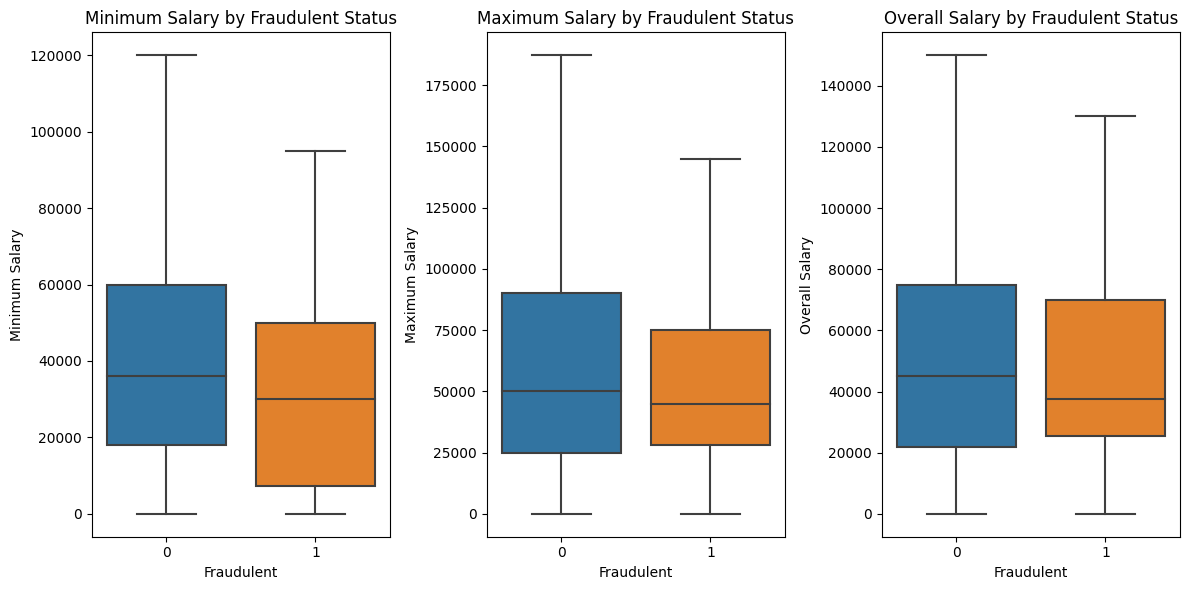

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='fraudulent', y='minimum_salary', data=df, showfliers=False)
plt.title('Minimum Salary by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Minimum Salary')

plt.subplot(1, 3, 2)
sns.boxplot(x='fraudulent', y='maximum_salary', data=df, showfliers=False)
plt.title('Maximum Salary by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Maximum Salary')

plt.subplot(1, 3, 3)
sns.boxplot(x='fraudulent', y='overall_salary', data=df, showfliers=False)
plt.title('Overall Salary by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Overall Salary')

plt.tight_layout()
plt.show()

### Multiclass columns

Some multiclass features need to be processed to ensure classes are well defined

In [ ]:
for col in multiclass_cols:
    print(f'Column "{col}":')
    print(df[col].value_counts())
    print()

Column "location":
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

Column "department":
Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtyp

In [ ]:
structured_multiclass_cols = ['employment_type', 'required_experience', 'required_education', 'function','department', 'industry']
unstructured_multiclass_cols = ['location'] #requires individual analysis and further processing, due to large size

#### Cleaning unstructured

Location

In [ ]:
location_counts = df['location'].value_counts()
print(location_counts[:20])

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
US, CA, Los Angeles      185
GB, , London             179
US, TX, Austin           174
US, CA, San Diego        164
GB, ,                    138
US, GA, Atlanta          135
GB, LND,                 131
US, OR, Portland         131
CA, ON, Toronto          123
US, MA, Boston           117
Name: location, dtype: int64


In [ ]:
#processing
def split_location(location):
    if pd.isna(location):
        return pd.Series([np.nan, np.nan, np.nan], index=['country', 'state', 'city'])
    else:
        parts = location.split(', ')
        # Ensure that there are three parts (country, state, city)
        if len(parts) == 3:
            return pd.Series(parts, index=['country', 'state', 'city'])
        else:
            return pd.Series([np.nan, np.nan, np.nan], index=['country', 'state', 'city'])

df[['country', 'state', 'city']] = df['location'].apply(split_location)
df = df.drop(['state', 'city', 'location'], axis=1) #only keep 'country'

df['country'].value_counts()

US    10543
GB     2352
GR      923
CA      454
DE      380
      ...  
UG        1
SD        1
MA        1
SI        1
KH        1
Name: country, Length: 90, dtype: int64

### Text columns

In [ ]:
for i in text_cols:
  df[i] = df[i].astype("string")

In [ ]:
df[text_cols].head()

,title,company_profile,description,requirements,benefits
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,<NA>
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,<NA>
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


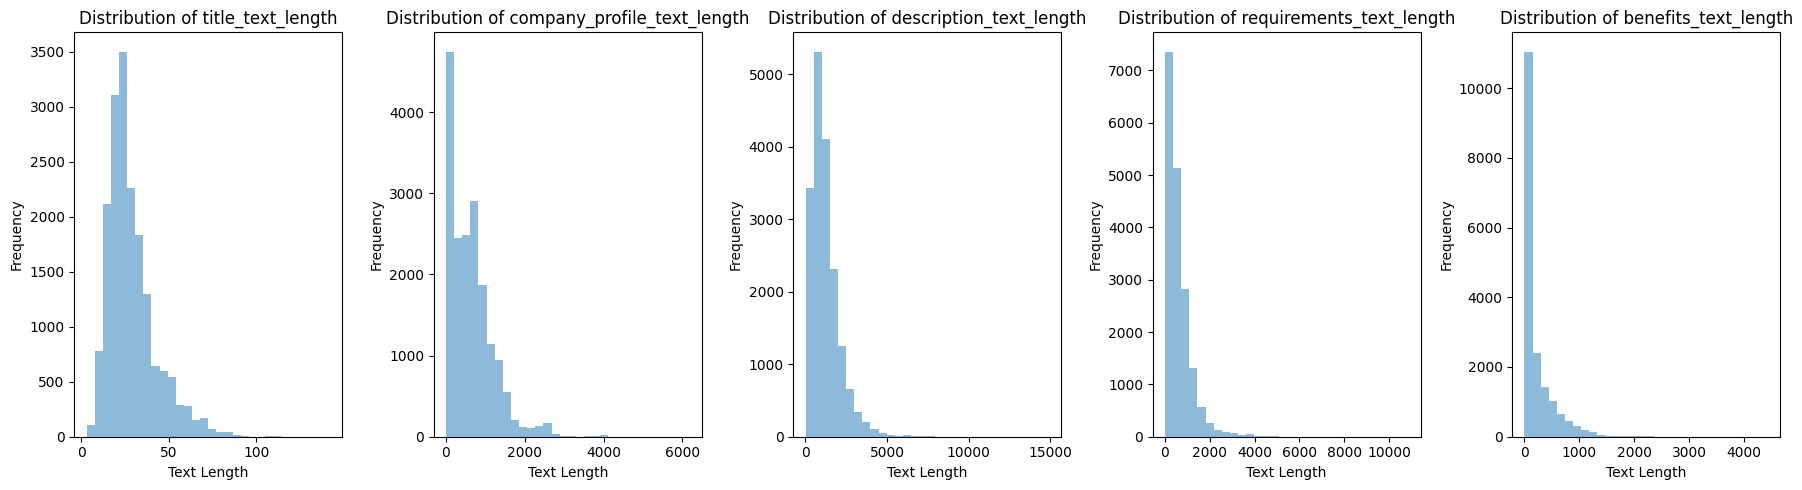

In [ ]:
text_df = pd.DataFrame()

for col in text_cols:
  new_col = col + '_text_length'
  text_df[new_col] = df[col].apply(str).apply(len)

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for i, col in enumerate(text_df.columns):
    axes[i].hist(text_df[col], bins=30, alpha=0.5)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Text Length')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
text_df.describe()

,title_text_length,company_profile_text_length,description_text_length,requirements_text_length,benefits_text_length
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,28.530313,621.641499,1218.004642,590.735347,210.509116
std,13.871256,566.645857,894.828316,612.612184,336.081662
min,3.000000,4.000000,4.000000,1.000000,1.000000
25%,19.000000,138.000000,607.000000,146.000000,4.000000
50%,25.000000,570.000000,1017.000000,467.000000,45.000000
75%,35.000000,879.000000,1586.000000,820.000000,294.000000
max,142.000000,6178.000000,14907.000000,10864.000000,4429.000000


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

Most common words for 'title': {'Customer Service': 1.0, 'English Teacher': 0.9600532623169108, 'Teacher Abroad': 0.918774966711052, 'Manager': 0.8388814913448736, 'Engineer': 0.6897470039946738, 'Senior': 0.6498002663115846, 'Developer': 0.6125166444740346, 'Software Engineer': 0.5392809587217043, 'Specialist': 0.47003994673768307, 'Time': 0.4647137150466045, 'Director': 0.4607190412782956, 'Service Associate': 0.4567243675099867, 'Assistant': 0.3821571238348868, 'Year Olds': 0.37017310252996005, 'Web Developer': 0.3581890812250333, 'Analyst': 0.340878828229028, 'Lead': 0.33422103861517977, 'NAS Year': 0.3249001331557923, 'Sales Representative': 0.3235685752330226, 'Account Manager': 0.30758988015978694, 'Abroad Conversational': 0.303595206391478, 'Project Manager': 0.29161118508655126, 'Junior': 0.2862849533954727, 'Business Development': 0.2809587217043941, 'Associate': 0.2782956058588549, 'Graduates English': 0.27163781624500666, 'Marketing': 0.2529960053262317, 'Account Executive'

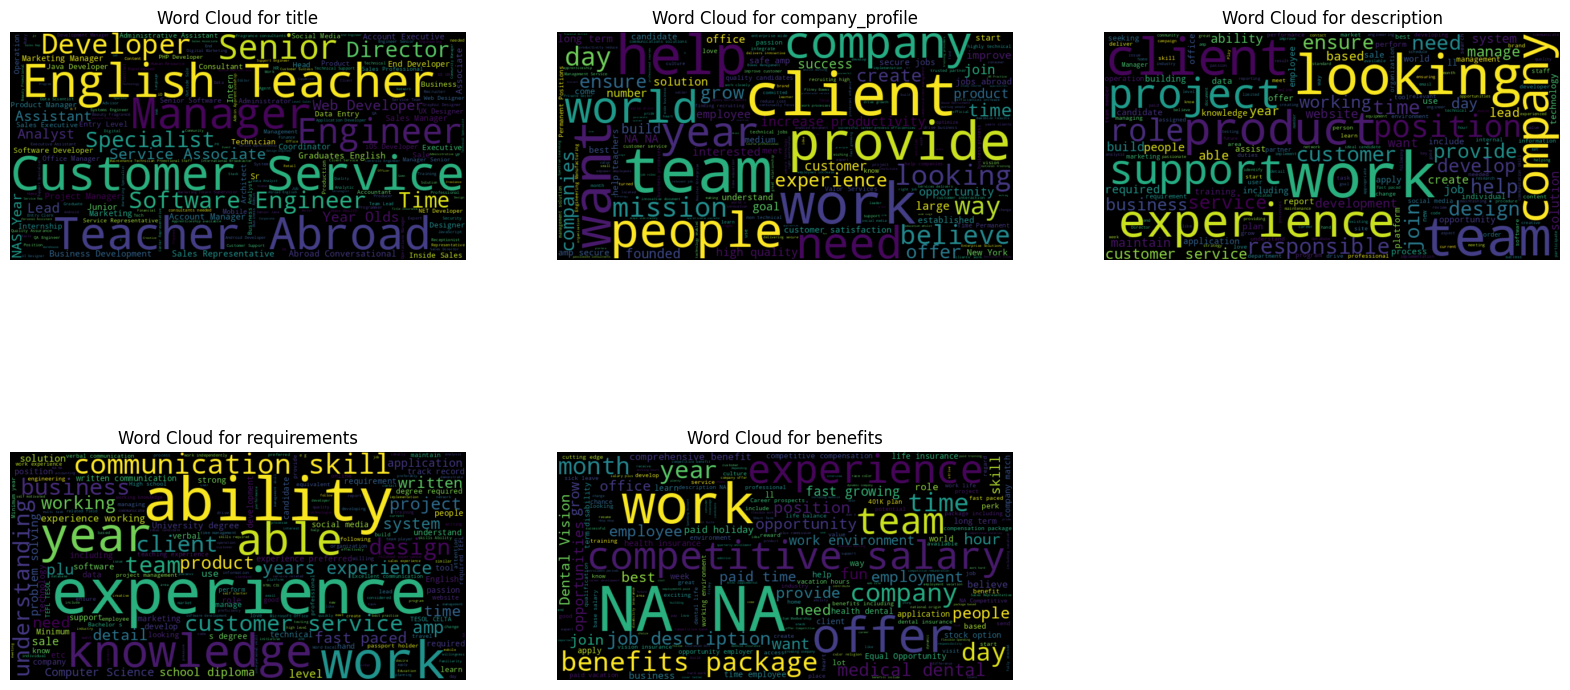

<Figure size 2000x1000 with 0 Axes>

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(20, 10))

unique_word_counts = {}

for i, col in enumerate(text_cols, 1):
    plt.subplot(2, 3, i)

    text = ' '.join(df[col].apply(str)) #apply str() needed as some are detected as int

    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, stopwords = STOPWORDS).generate(text)

    print(f"Most common words for '{col}': {wordcloud.words_}")

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for {col}')
    plt.axis('off')

    unique_words = set(text.split())
    unique_word_counts[col] = len(unique_words)

for col, count in unique_word_counts.items():
    print(f"Total unique words in '{col}': {count}")

plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#text combination
df[text_cols] = df[text_cols].replace({pd.NA: ""})
df['text'] = df['title'] + ' ' + df['company_profile']
+ ' '+ df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

def clean_text(text):
  # Check if the text is NaN
    if pd.isna(text):
        return ""
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Removing numbers
    filtered_tokens = [word for word in filtered_tokens if not word.isdigit()]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Joining the tokens back into text
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

df['clean_text'] = df['text'].apply(clean_text)
df['clean_text'].head(10)

0    market intern food52 weve creat groundbreak aw...
1    custom servic cloud video product second world...
2    commiss machineri assist cma valor servic prov...
3    account execut washington dc passion improv qu...
4    bill review manag spotsourc solut llc global h...
5    account clerk job overviewapex environment con...
6    head content mf found fonpit ag rose intern we...
7    lead guest servic specialist airenvi ’ mission...
8    hp bsm sme solutions3 womanown small busi whos...
9    custom servic associ part time novitex enterpr...
Name: clean_text, dtype: object

#### clean and unclean text dataset versions

In [ ]:
df_original = df.copy() #cleaned and orginal uncleaned

df = df.drop(text_cols, axis=1)
df['text'] = df['clean_text']
df = df.drop('clean_text', axis=1)


## Global Preprocessing

### NA values

In [ ]:
df.isna().sum()

job_id                     0
department             11547
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
minimum_salary         15017
maximum_salary         15034
overall_salary         15039
country                  558
text                       0
dtype: int64

In [ ]:
missing_columns = df.columns[df.isnull().any()]
missing_values = df[missing_columns].isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])
df['minimum_salary'] = df['minimum_salary'].fillna(-9999)
df['maximum_salary'] = df['maximum_salary'].fillna(-9999)
df['overall_salary'] = df['overall_salary'].fillna(-9999)

Columns with missing values:
department             11547
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
minimum_salary         15017
maximum_salary         15034
overall_salary         15039
country                  558
dtype: int64


In [ ]:
df.isna().sum()

job_id                     0
department             11547
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
minimum_salary             0
maximum_salary             0
overall_salary             0
country                  558
text                       0
dtype: int64

# Save cleaned dataset

In [ ]:
df.head(20)

,job_id,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,minimum_salary,maximum_salary,overall_salary,country,text
0,1,Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0,-9999.0,-9999.0,-9999.0,US,market intern food52 weve creat groundbreak aw...
1,2,Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,-9999.0,-9999.0,-9999.0,NZ,custom servic cloud video product second world...
2,3,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,-9999.0,-9999.0,-9999.0,US,commiss machineri assist cma valor servic prov...
3,4,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,-9999.0,-9999.0,-9999.0,US,account execut washington dc passion improv qu...
4,5,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,-9999.0,-9999.0,-9999.0,US,bill review manag spotsourc solut llc global h...
5,6,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-9999.0,-9999.0,-9999.0,US,account clerk job overviewapex environment con...
6,7,ANDROIDPIT,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,20000.0,28000.0,24000.0,DE,head content mf found fonpit ag rose intern we...
7,8,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0,-9999.0,-9999.0,-9999.0,US,lead guest servic specialist airenvi ’ mission...
8,9,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0,-9999.0,-9999.0,-9999.0,US,hp bsm sme solutions3 womanown small busi whos...
9,10,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0,-9999.0,-9999.0,-9999.0,US,custom servic associ part time novitex enterpr...


In [ ]:
df.to_csv('gdrive/My Drive/BT4012 Project/cleaned_fake_job_postings.csv',index=False)

#Preprocessing


In [3]:
df = pd.read_csv("gdrive/My Drive/BT4012 Project/cleaned_fake_job_postings.csv")

In [4]:
df.head()

,job_id,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,minimum_salary,maximum_salary,overall_salary,country,text
0,1,Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0,-9999.0,-9999.0,-9999.0,US,market intern food52 weve creat groundbreak aw...
1,2,Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,-9999.0,-9999.0,-9999.0,NZ,custom servic cloud video product second world...
2,3,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,-9999.0,-9999.0,-9999.0,US,commiss machineri assist cma valor servic prov...
3,4,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,-9999.0,-9999.0,-9999.0,US,account execut washington dc passion improv qu...
4,5,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,-9999.0,-9999.0,-9999.0,US,bill review manag spotsourc solut llc global h...


In [5]:
df = df.drop('job_id', axis=1)

## Train test split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df.copy().drop('fraudulent', axis=1)
y = df['fraudulent']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [7]:
print(X_train.shape)
X_train

(10728, 14)


,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,minimum_salary,maximum_salary,overall_salary,country,text
13556,IT,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-9999.0,-9999.0,-9999.0,IN,front end develop 47billion product engin expe...
9182,Marketing team,0,1,0,Full-time,Mid-Senior level,NaN,Internet,Marketing,-9999.0,-9999.0,-9999.0,GB,market partnership manag take hassl find book ...
6788,NaN,0,1,0,Full-time,Internship,High School or equivalent,NaN,Administrative,-9999.0,-9999.0,-9999.0,GB,m14 5ht busi admin apprenticeship avail na yea...
1536,Sales,1,0,0,NaN,NaN,NaN,NaN,NaN,-9999.0,-9999.0,-9999.0,CN,sale consult want part innov sale team earn bi...
8182,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,-9999.0,-9999.0,-9999.0,US,process improv project engin manag provid full...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,Live Operations,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Entertainment,Engineering,70.0,90.0,80.0,CA,server develop magmic lead develop publish mob...
1895,Strategy,0,1,1,Full-time,Mid-Senior level,Master's Degree,Marketing and Advertising,Data Analyst,-9999.0,-9999.0,-9999.0,GR,research analyst monitor manag young dynam fas...
10675,NaN,0,0,0,Full-time,Associate,NaN,Information Technology and Services,Engineering,-9999.0,-9999.0,-9999.0,PL,go develop urlc914851eb385d8c6471d602008fc4e84...
10813,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,-9999.0,-9999.0,-9999.0,US,custom servic associ novitex enterpris solut f...


##Numeric preprocessing

In [8]:
from sklearn.preprocessing import RobustScaler

numeric_columns = ['minimum_salary', 'maximum_salary', 'overall_salary']

# Fit and transform the numeric columns
scaler = RobustScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [9]:
print(X_train.shape)
X_train.head(20)

(10728, 14)


,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,minimum_salary,maximum_salary,overall_salary,country,text
13556,IT,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0.0,0.0,0.0,IN,front end develop 47billion product engin expe...
9182,Marketing team,0,1,0,Full-time,Mid-Senior level,NaN,Internet,Marketing,0.0,0.0,0.0,GB,market partnership manag take hassl find book ...
6788,NaN,0,1,0,Full-time,Internship,High School or equivalent,NaN,Administrative,0.0,0.0,0.0,GB,m14 5ht busi admin apprenticeship avail na yea...
1536,Sales,1,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,CN,sale consult want part innov sale team earn bi...
8182,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0.0,0.0,0.0,US,process improv project engin manag provid full...
2805,NaN,0,0,0,Full-time,Associate,Bachelor's Degree,Banking,Information Technology,0.0,0.0,0.0,US,senior softwar engin credit karma incsan franc...
15963,Administration,0,1,1,Part-time,Entry level,Unspecified,Information Technology and Services,Customer Service,0.0,0.0,0.0,US,offic administr mclane intel believ everyon lo...
8768,Commercial,0,1,0,Full-time,NaN,NaN,Events Services,Sales,0.0,0.0,0.0,GB,countri director ukireland companyw ticketscri...
13944,R&D,0,1,0,Full-time,Mid-Senior level,Associate Degree,Oil & Energy,Information Technology,0.0,0.0,0.0,US,network oper center technician wellawar oil fi...
6943,NaN,0,1,1,Contract,Associate,Bachelor's Degree,Telecommunications,Customer Service,0.0,0.0,0.0,US,call center logist profession year apr consult...


## Categorical preprocessing

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['employment_type', 'required_experience', 'required_education',
                       'function','department', 'industry','country']

# Initialize OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown="ignore"), categorical_columns)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
X_val_encoded = preprocessor.transform(X_val)

# Convert the encoded arrays into DataFrames
X_train = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val_encoded, columns=preprocessor.get_feature_names_out())


# encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown="ignore")

# # Fit and transform on training data
# X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
# X_test_encoded = encoder.transform(X_test[categorical_columns])
# X_val_encoded = encoder.transform(X_val[categorical_columns])

# # Convert to DataFrames and concatenate
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
# X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
# X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenate encoded columns to datasets
# X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
# X_test = pd.concat([X_test, X_test_encoded_df], axis=1)
# X_val = pd.concat([X_val, X_val_encoded_df], axis=1)

# # Drop the original categorical columns if needed
# X_train = X_train.drop(categorical_columns, axis=1)
# X_test = X_test.drop(categorical_columns, axis=1)
# X_val = X_val.drop(categorical_columns, axis=1)


# # Create a DataFrame with the categorical columns
# categorical_df = df[categorical_columns]

# # Apply one-hot encoding to categorical columns
# one_hot_encoded_df = pd.get_dummies(categorical_df, prefix=categorical_columns)

# # Concatenate the one-hot encoded categorical columns back to the original dataset
# df = pd.concat([df, one_hot_encoded_df], axis=1)

# # Drop the original categorical columns if needed
# df = df.drop(categorical_columns, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [11]:
print(X_train.shape)
X_train.head(20)

(10728, 1241)


,cat__employment_type_Full-time,cat__employment_type_Other,cat__employment_type_Part-time,cat__employment_type_Temporary,cat__employment_type_nan,cat__required_experience_Director,cat__required_experience_Entry level,cat__required_experience_Executive,cat__required_experience_Internship,cat__required_experience_Mid-Senior level,...,cat__country_ZA,cat__country_ZM,cat__country_nan,remainder__telecommuting,remainder__has_company_logo,remainder__has_questions,remainder__minimum_salary,remainder__maximum_salary,remainder__overall_salary,remainder__text
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,1,0,0.0,0.0,0.0,front end develop 47billion product engin expe...
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,1,0,0.0,0.0,0.0,market partnership manag take hassl find book ...
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,1,0,0.0,0.0,0.0,m14 5ht busi admin apprenticeship avail na yea...
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0.0,0.0,0.0,sale consult want part innov sale team earn bi...
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,process improv project engin manag provid full...
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,senior softwar engin credit karma incsan franc...
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1,0.0,0.0,0.0,offic administr mclane intel believ everyon lo...
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0.0,0.0,0.0,countri director ukireland companyw ticketscri...
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,1,0,0.0,0.0,0.0,network oper center technician wellawar oil fi...
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1,0.0,0.0,0.0,call center logist profession year apr consult...


In [12]:
# List all columns starting with 'cat__'
cat_columns = [col for col in X_train.columns if col.startswith('cat__')]

# Convert selected columns to integer type
X_train[cat_columns] = X_train[cat_columns].astype(int)
X_test[cat_columns] = X_test[cat_columns].astype(int)
X_val[cat_columns] = X_val[cat_columns].astype(int)

In [13]:
# rename to remove "remainder__"
datasets = [X_train, X_test, X_val]

for dataset in datasets:
    dataset.rename(columns=lambda col: col.split("remainder__")[-1] if "remainder__" in col else col, inplace=True)

print(X_train.shape)
X_train.head()

(10728, 1241)


,cat__employment_type_Full-time,cat__employment_type_Other,cat__employment_type_Part-time,cat__employment_type_Temporary,cat__employment_type_nan,cat__required_experience_Director,cat__required_experience_Entry level,cat__required_experience_Executive,cat__required_experience_Internship,cat__required_experience_Mid-Senior level,...,cat__country_ZA,cat__country_ZM,cat__country_nan,telecommuting,has_company_logo,has_questions,minimum_salary,maximum_salary,overall_salary,text
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.0,0.0,0.0,front end develop 47billion product engin expe...
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.0,0.0,0.0,market partnership manag take hassl find book ...
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0.0,0.0,0.0,m14 5ht busi admin apprenticeship avail na yea...
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,sale consult want part innov sale team earn bi...
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,process improv project engin manag provid full...


## Text preprocessing

In [14]:
# preprocessing text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_train = pd.concat([X_train, pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)
X_train = X_train.drop(['text'], axis=1)
X_test_tfidf = vectorizer.fit_transform(X_test['text'])
X_test = pd.concat([X_test, pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)
X_test = X_test.drop(['text'], axis=1)
X_val_tfidf = vectorizer.fit_transform(X_val['text'])
X_val = pd.concat([X_val, pd.DataFrame(X_val_tfidf.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)
X_val = X_val.drop(['text'], axis=1)


# text_col = ["text",]

# # Create a TF-IDF vectorizer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('tfidf', TfidfVectorizer(max_features=5000, decode_error="ignore"), text_col)
#     ],
#     remainder='passthrough'  # Pass through non-categorical columns
# )

# # Fit and transform the data
# X_train_tfidf = preprocessor.fit_transform(X_train)
# X_test_tfidf = preprocessor.transform(X_test)
# X_val_tfidf = preprocessor.transform(X_val)

# # Convert the tfidf arrays into DataFrames
# X_train = pd.DataFrame(X_train_tfidf, columns=preprocessor.get_feature_names_out())
# X_test = pd.DataFrame(X_test_tfidf, columns=preprocessor.get_feature_names_out())
# X_val = pd.DataFrame(X_val_tfidf, columns=preprocessor.get_feature_names_out())


# vectorizer = TfidfVectorizer(max_features=5000)
# X_tfidf = vectorizer.fit_transform(df['text'])
# df_vectorized = pd.concat([df, pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)
# df_vectorized = df_vectorized.drop(['text'], axis=1)


In [15]:
print(X_train.shape)
X_train.head()

(10728, 6239)


,cat__employment_type_Full-time,cat__employment_type_Other,cat__employment_type_Part-time,cat__employment_type_Temporary,cat__employment_type_nan,cat__required_experience_Director,cat__required_experience_Entry level,cat__required_experience_Executive,cat__required_experience_Internship,cat__required_experience_Mid-Senior level,...,τα,τη,την,της,τις,το,του,τους,των,ότι
0,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Type conversion

In [16]:
# List of columns to convert to integer type
columns_to_convert = ['telecommuting', 'has_company_logo', 'has_questions', 'minimum_salary', 'maximum_salary', 'overall_salary']

# Convert selected columns to integer type
X_train[columns_to_convert] = X_train[columns_to_convert].astype(int)
X_test[columns_to_convert] = X_test[columns_to_convert].astype(int)
X_val[columns_to_convert] = X_val[columns_to_convert].astype(int)

## Under and over sampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

# Oversample the minority class using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_train, y_train)

In [18]:
y_train.value_counts()

0    10208
1      520
Name: fraudulent, dtype: int64

In [19]:
y_resampled_under.value_counts()

0    520
1    520
Name: fraudulent, dtype: int64

In [20]:
y_resampled_over.value_counts()

0    10208
1    10208
Name: fraudulent, dtype: int64

# Model Training

In [21]:
!pip -q install shap
import shap

In [22]:
from sklearn.metrics import (
    average_precision_score, recall_score, balanced_accuracy_score,
    fbeta_score, confusion_matrix, precision_score, f1_score, accuracy_score,
    roc_auc_score
)

def evaluate_model(y_true, y_pred):
    auc_pr = average_precision_score(y_true, y_pred)
    geometric_mean = (recall_score(y_true, y_pred, zero_division=1) * balanced_accuracy_score(y_true, y_pred))**0.5
    f2_score = fbeta_score(y_true, y_pred, beta=2, zero_division=1)
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(f"AUC-PR: {auc_pr:.2f}")
    print(f"G-Mean: {geometric_mean:.2f}")
    print(f"F2-Score: {f2_score:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegressionCV

In [24]:
# Create and train the logistic regression model
model = LogisticRegressionCV(cv=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values)

evaluate_model(y_test, y_pred)

AUC-PR: 0.05
G-Mean: 0.00
F2-Score: 0.00
Confusion Matrix:
[[3403    0]
 [ 173    0]]
Precision: 1.00
Recall: 0.00
F1-Score: 0.00
Accuracy: 0.95


X does not have valid feature names, but LogisticRegressionCV was fitted with feature names


In [25]:
# Create and train the logistic regression model
model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values)

evaluate_model(y_test, y_pred)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to conve

AUC-PR: 0.13
G-Mean: 0.57
F2-Score: 0.39
Confusion Matrix:
[[3137  266]
 [  93   80]]
Precision: 0.23
Recall: 0.46
F1-Score: 0.31
Accuracy: 0.90


X does not have valid feature names, but LogisticRegressionCV was fitted with feature names


In [26]:
# Get the coefficients and their absolute values
coefficients = model.coef_[0]
abs_coefficients = np.abs(coefficients)

# Get the indices of top 10 features with highest absolute coefficients
top_10_indices = np.argsort(abs_coefficients)[::-1][:10]

# Get the names of the top 10 features
top_10_features = X_train.columns[top_10_indices]

# Print the top 10 important features
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
Index(['requirements1', 'reduc', 'realtor', 'aptitud', 'unmatch',
       'mondayfriday', 'in', 'matur', 'findingrecruit', 'dilig'],
      dtype='object')


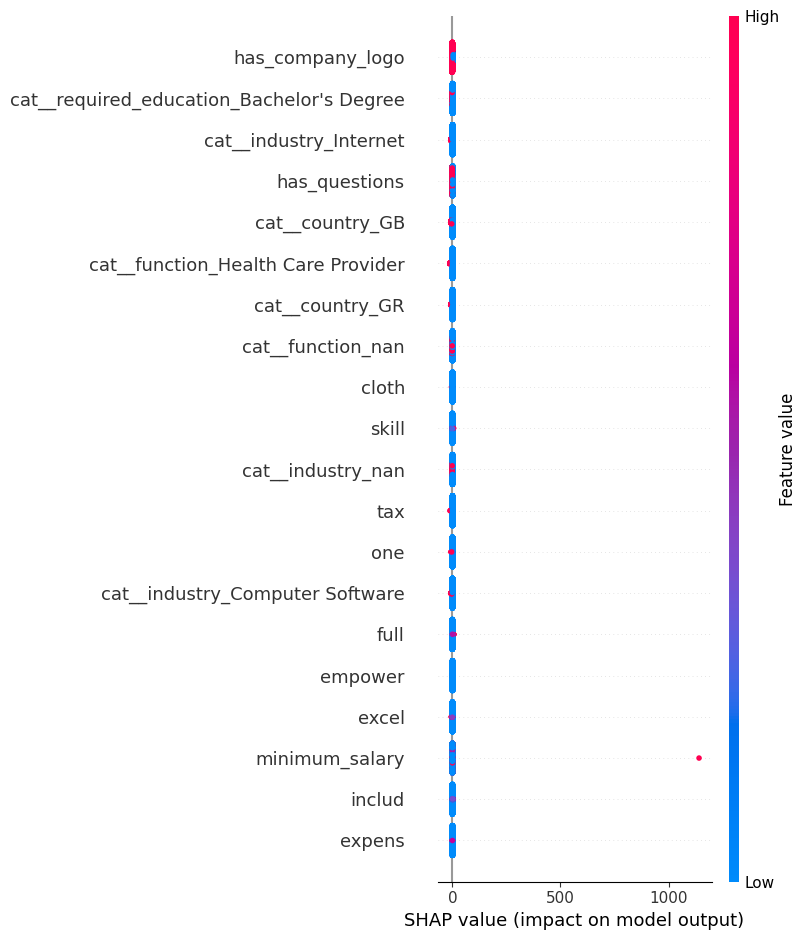

In [27]:
# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

### Oversampling and undersampling

In [28]:
from sklearn.linear_model import LogisticRegression

# Under-sampling model
logistic_model_under = LogisticRegressionCV(cv=5, random_state=42)
logistic_model_under.fit(X_resampled_under.values, y_resampled_under)

# Make predictions on the test set
y_pred_under = logistic_model_under.predict(X_test.values)

# Evaluate the under-sampling model
print("Evaluation on Undersampled Data:")
evaluate_model(y_test, y_pred_under)

Evaluation on Undersampled Data:
AUC-PR: 0.11
G-Mean: 0.66
F2-Score: 0.38
Confusion Matrix:
[[2842  561]
 [  69  104]]
Precision: 0.16
Recall: 0.60
F1-Score: 0.25
Accuracy: 0.82


In [29]:
# Over-sampling model
logistic_model_over = LogisticRegressionCV(cv=5, random_state=42)
logistic_model_over.fit(X_resampled_over.values, y_resampled_over)

# Make predictions on the test set
y_pred_over = logistic_model_over.predict(X_test.values)

# Evaluate the over-sampling model
print("\nEvaluation on Oversampled Data:")
evaluate_model(y_test, y_pred_over)


Evaluation on Oversampled Data:
AUC-PR: 0.09
G-Mean: 0.71
F2-Score: 0.34
Confusion Matrix:
[[2380 1023]
 [  49  124]]
Precision: 0.11
Recall: 0.72
F1-Score: 0.19
Accuracy: 0.70


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test.values)

# Evaluate the model
evaluate_model(y_test, y_pred)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


AUC-PR: 0.05
G-Mean: 0.00
F2-Score: 0.00
Confusion Matrix:
[[3403    0]
 [ 173    0]]
Precision: 1.00
Recall: 0.00
F1-Score: 0.00
Accuracy: 0.95


In [32]:
# Retrieve feature importances from RandomForestClassifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top important features from RandomForestClassifier
print("Top 10 Important Features from RandomForestClassifier:")
print(feature_importance_df_rf.head(10))

Top 10 Important Features from RandomForestClassifier:
                         Feature  Importance
1235            has_company_logo    0.014275
3666                      lawson    0.008698
2568                        earn    0.008300
4285                  overviewak    0.007820
1399                        aker    0.007784
2694                       entri    0.007003
2068                  colleagues    0.006621
2015                       clerk    0.005840
4898               requirements1    0.005773
1109  cat__industry_Oil & Energy    0.005728


In [33]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test.values)

# Evaluate the model
evaluate_model(y_test, y_pred)

AUC-PR: 0.05
G-Mean: 0.00
F2-Score: 0.00
Confusion Matrix:
[[3403    0]
 [ 173    0]]
Precision: 1.00
Recall: 0.00
F1-Score: 0.00
Accuracy: 0.95


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [34]:
# Retrieve feature importances from RandomForestClassifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top important features from RandomForestClassifier
print("Top 10 Important Features from RandomForestClassifier:")
print(feature_importance_df_rf.head(10))

Top 10 Important Features from RandomForestClassifier:
                           Feature  Importance
1235              has_company_logo    0.026755
2568                          earn    0.007236
4386                           per    0.007108
2694                         entri    0.007099
4285                    overviewak    0.006835
1109    cat__industry_Oil & Energy    0.006001
1554                        assist    0.005790
5243                         skill    0.005286
5579                          team    0.005275
25    cat__function_Administrative    0.004790


In [35]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced_subsample", random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test.values)

# Evaluate the model
evaluate_model(y_test, y_pred)

AUC-PR: 0.09
G-Mean: 0.26
F2-Score: 0.14
Confusion Matrix:
[[3373   30]
 [ 152   21]]
Precision: 0.41
Recall: 0.12
F1-Score: 0.19
Accuracy: 0.95


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [36]:
# Retrieve feature importances from RandomForestClassifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top important features from RandomForestClassifier
print("Top 10 Important Features from RandomForestClassifier:")
print(feature_importance_df_rf.head(10))

Top 10 Important Features from RandomForestClassifier:
                                        Feature  Importance
1235                           has_company_logo    0.034444
6054                                        web    0.007725
12    cat__required_education_Bachelor's Degree    0.007390
5903                                         us    0.007163
1228                            cat__country_US    0.007114
1236                              has_questions    0.006684
4386                                        per    0.006594
5243                                      skill    0.006543
5579                                       team    0.006080
4346                                    passion    0.005562


###Oversampling and Undersampling


In [37]:
rf_model_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_under.fit(X_resampled_under, y_resampled_under)

y_pred_under = rf_model_under.predict(X_test.values)

print("Evaluation on Undersampled Data:")
evaluate_model(y_test, y_pred_under)

Evaluation on Undersampled Data:
AUC-PR: 0.08
G-Mean: 0.79
F2-Score: 0.31
Confusion Matrix:
[[1790 1613]
 [  19  154]]
Precision: 0.09
Recall: 0.89
F1-Score: 0.16
Accuracy: 0.54


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [38]:
# Retrieve feature importances from RandomForestClassifier
feature_importances_rf = rf_model_under.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_resampled_under.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top important features from RandomForestClassifier
print("Top 10 Important Features from RandomForestClassifier:")
print(feature_importance_df_rf.head(10))

Top 10 Important Features from RandomForestClassifier:
               Feature  Importance
1235  has_company_logo    0.024096
5579              team    0.009869
5243             skill    0.009539
1236     has_questions    0.007571
4386               per    0.007245
1554            assist    0.006088
2568              earn    0.005895
1228   cat__country_US    0.005739
1173   cat__country_GB    0.005736
5903                us    0.005359


In [39]:
rf_model_over = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_over.fit(X_resampled_over, y_resampled_over)

y_pred_over = rf_model_over.predict(X_test.values)

print("\nEvaluation on Oversampled Data:")
evaluate_model(y_test, y_pred_over)


Evaluation on Oversampled Data:
AUC-PR: 0.13
G-Mean: 0.36
F2-Score: 0.24
Confusion Matrix:
[[3347   56]
 [ 135   38]]
Precision: 0.40
Recall: 0.22
F1-Score: 0.28
Accuracy: 0.95


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [40]:
# Retrieve feature importances from RandomForestClassifier
feature_importances_rf = rf_model_over.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_resampled_over.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display the top important features from RandomForestClassifier
print("Top 10 Important Features from RandomForestClassifier:")
print(feature_importance_df_rf.head(10))

Top 10 Important Features from RandomForestClassifier:
                                        Feature  Importance
1235                           has_company_logo    0.039191
5579                                       team    0.009544
6054                                        web    0.007338
3169                                       grow    0.007226
4386                                        per    0.006590
3057                                        fun    0.006474
5903                                         us    0.006439
12    cat__required_education_Bachelor's Degree    0.006080
4346                                    passion    0.005875
5243                                      skill    0.005418


100%|===================| 7124/7152 [04:10<00:00]       

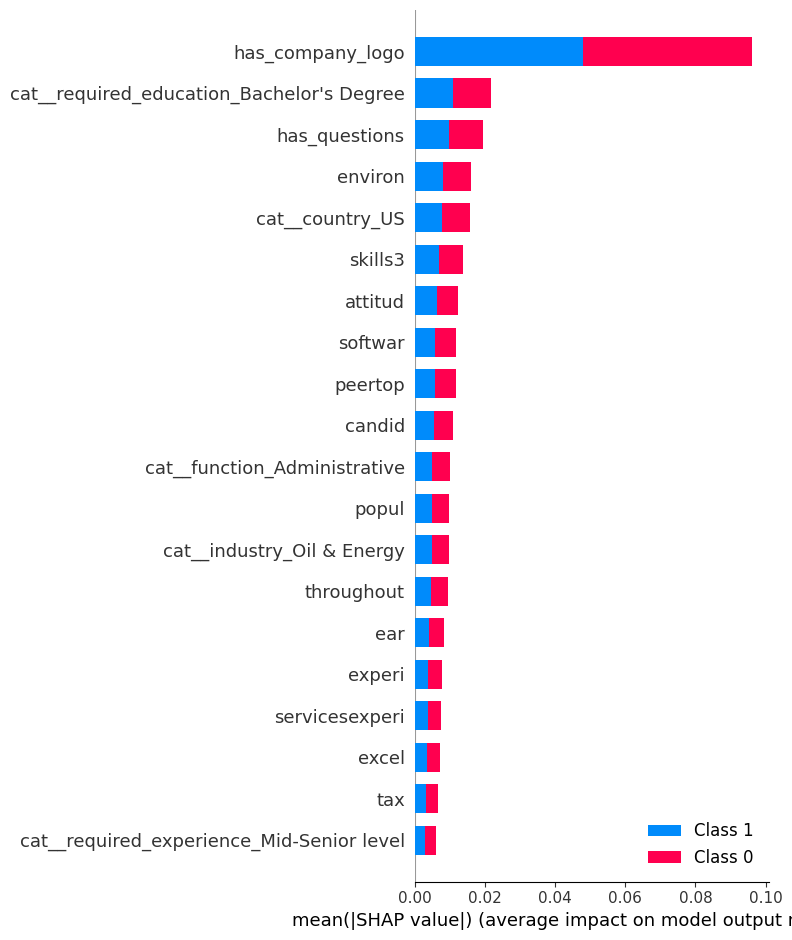

In [41]:
# Create a SHAP explainer for RandomForestClassifier
explainer_rf = shap.Explainer(rf_model_over, X_resampled_over)
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values_rf, X_test)

## XGBoost


In [42]:
import xgboost as xgb

In [43]:
# Instantiate the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', enable_categorical=True ,random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values)
y_proba = model.predict_proba(X_test.values)[:, 1]

# Evaluate the model
evaluate_model(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)
print(f"AUC ROC: {auc_roc:.2f}")

AUC-PR: 0.12
G-Mean: 0.28
F2-Score: 0.16
Confusion Matrix:
[[3386   17]
 [ 149   24]]
Precision: 0.59
Recall: 0.14
F1-Score: 0.22
Accuracy: 0.95
AUC ROC: 0.83


<Axes: >

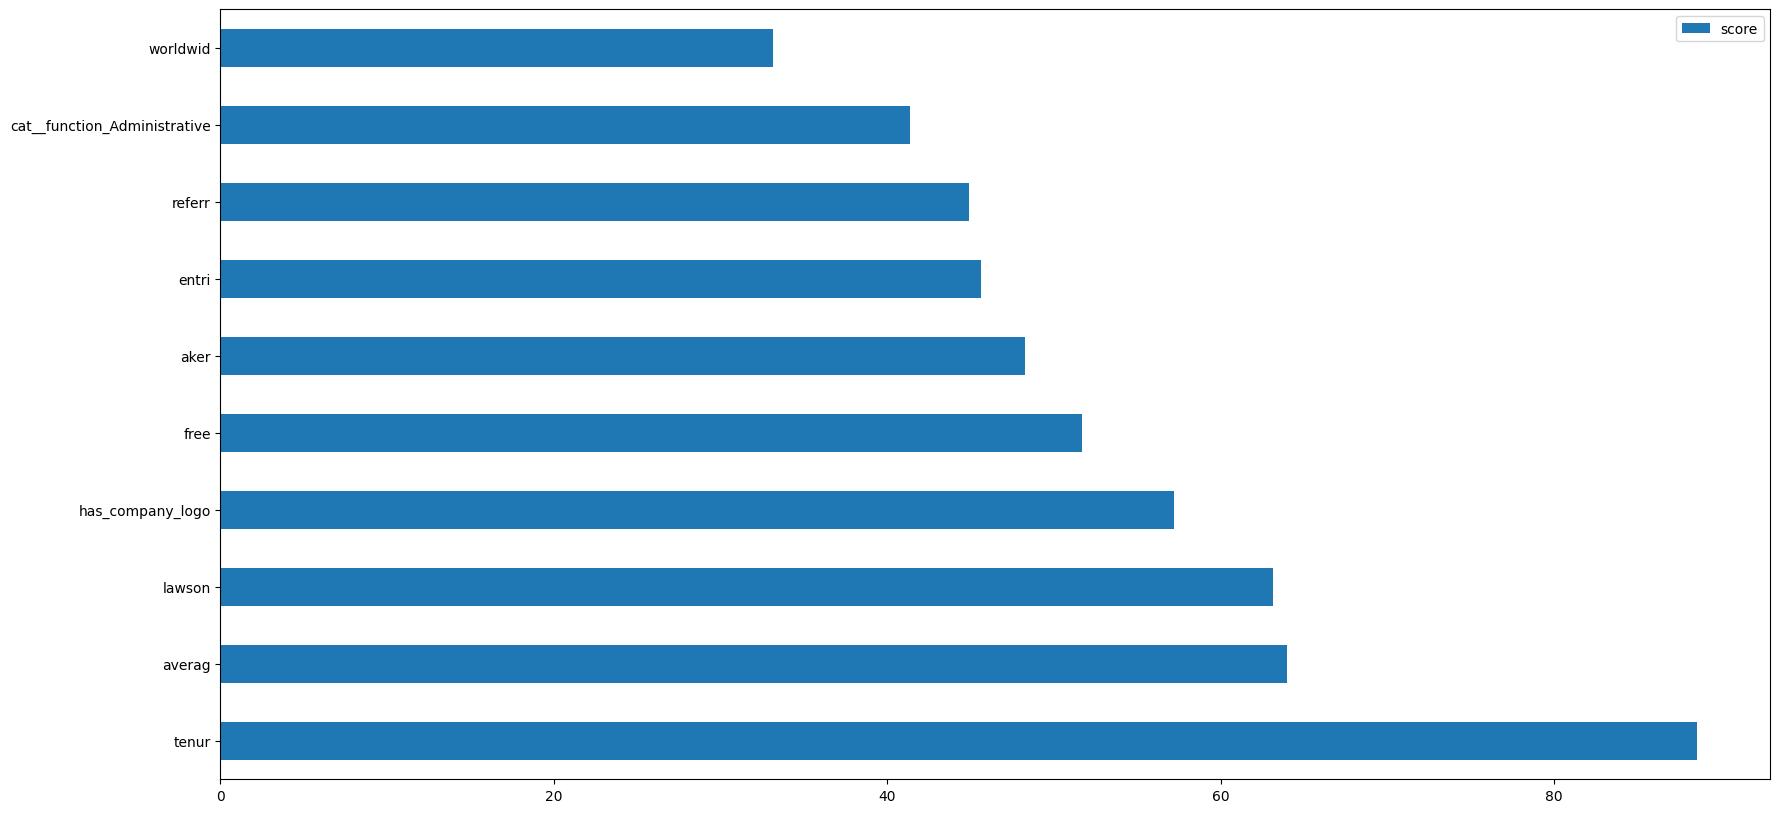

In [44]:
feature_important = model.get_booster().get_score(importance_type='gain')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

[13:46:39] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


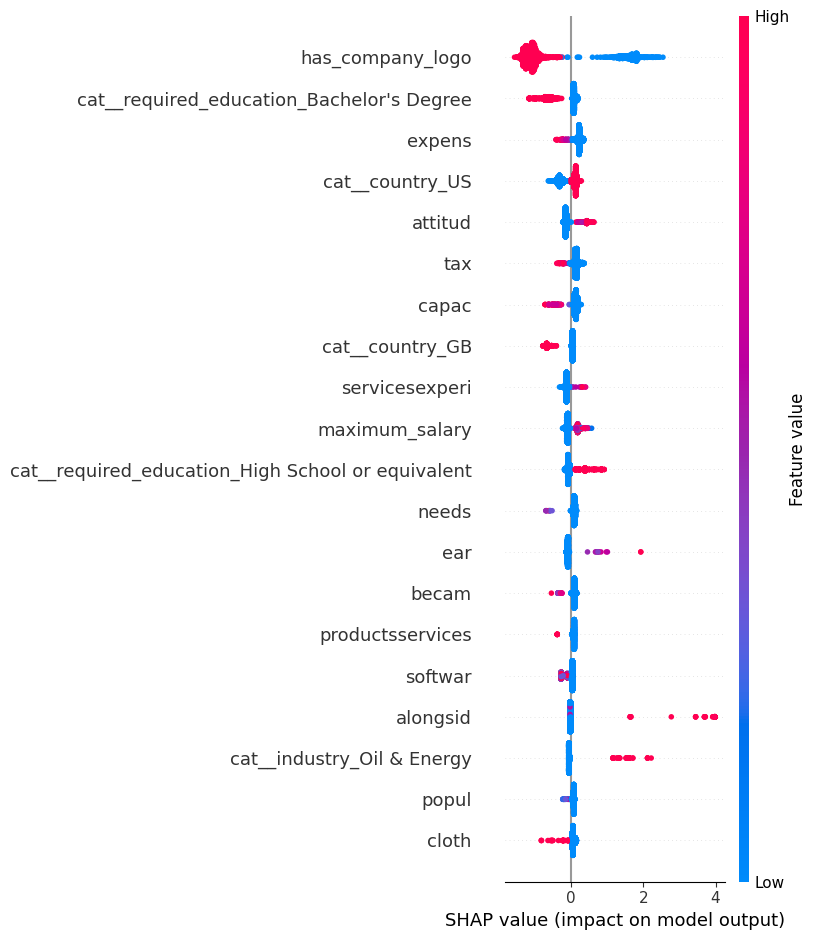

In [45]:
# Create a SHAP explainer for XGBoost
explainer_xgb = shap.Explainer(model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values_xgb, X_test)

###Oversampling and Undersampling


In [46]:
model_under = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model_under.fit(X_resampled_under, y_resampled_under)

y_pred_under = model_under.predict(X_test.values)
y_proba_under = model_under.predict_proba(X_test.values)[:, 1]

print("Evaluation on Undersampled Data:")
evaluate_model(y_test, y_pred_under)
auc_roc = roc_auc_score(y_test, y_proba_under)
print(f"AUC ROC: {auc_roc:.2f}")

Evaluation on Undersampled Data:
AUC-PR: 0.11
G-Mean: 0.64
F2-Score: 0.37
Confusion Matrix:
[[2823  580]
 [  72  101]]
Precision: 0.15
Recall: 0.58
F1-Score: 0.24
Accuracy: 0.82
AUC ROC: 0.81


<Axes: >

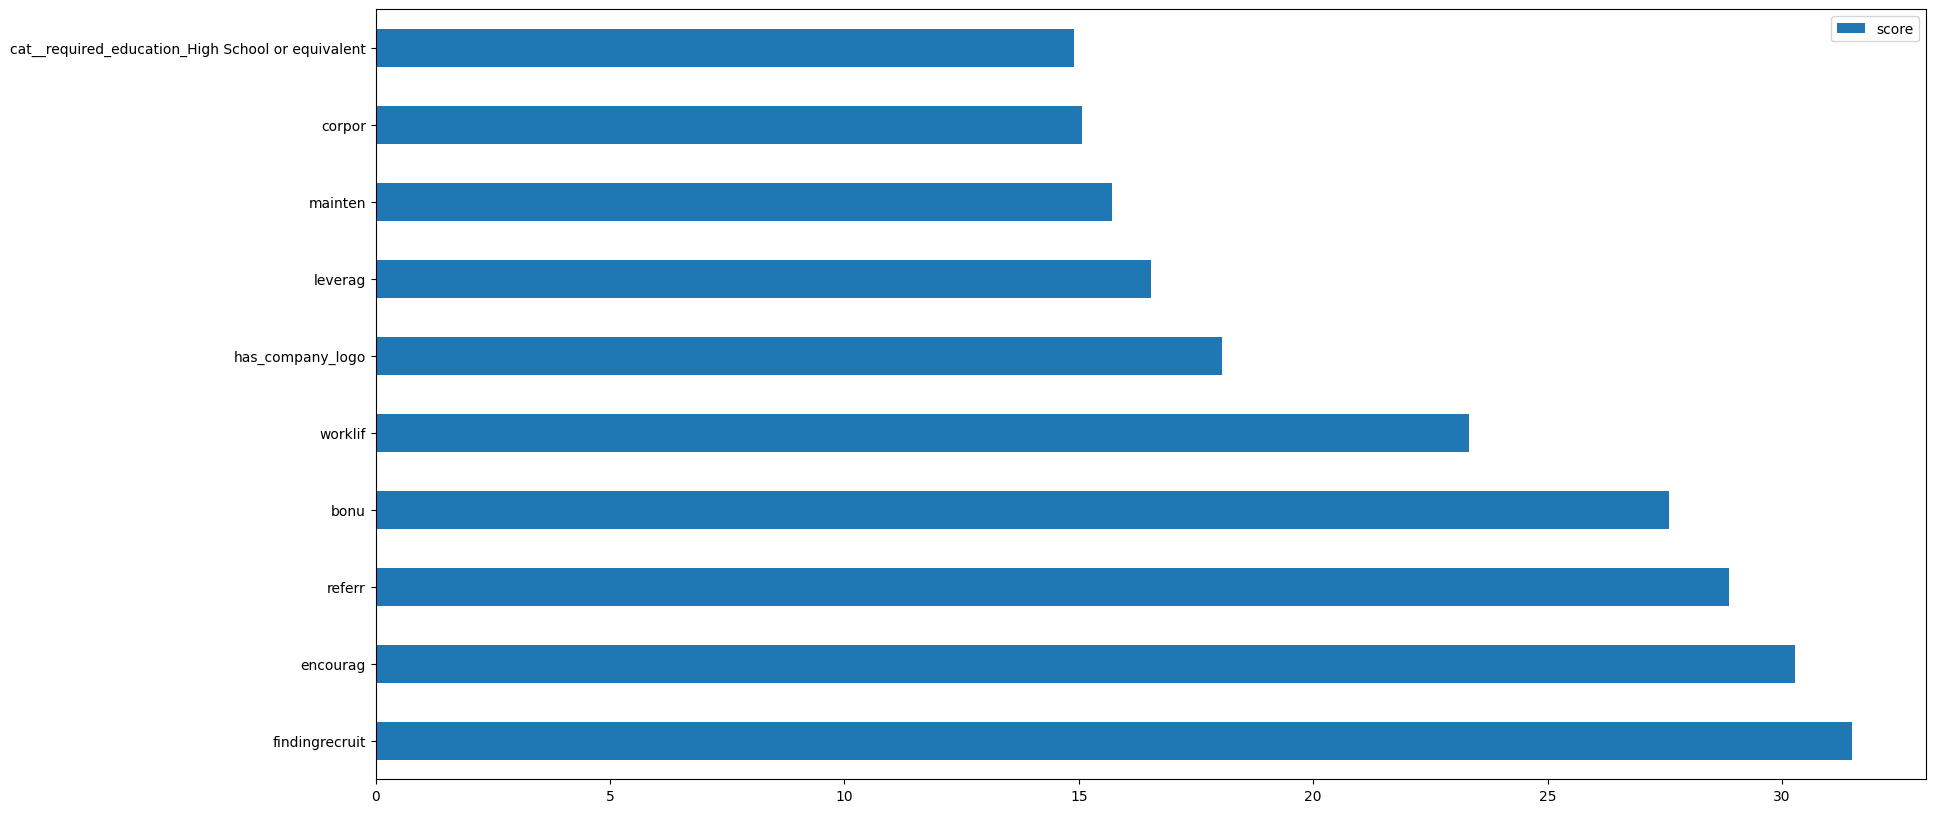

In [47]:
feature_important = model_under.get_booster().get_score(importance_type='gain')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

In [48]:
model_over = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model_over.fit(X_resampled_over, y_resampled_over)

y_pred_over = model_over.predict(X_test.values)
y_proba_over = model_over.predict_proba(X_test.values)[:, 1]

print("\nEvaluation on Oversampled Data:")
evaluate_model(y_test, y_pred_over)
auc_roc = roc_auc_score(y_test, y_proba_over)
print(f"AUC ROC: {auc_roc:.2f}")


Evaluation on Oversampled Data:
AUC-PR: 0.12
G-Mean: 0.51
F2-Score: 0.34
Confusion Matrix:
[[3188  215]
 [ 106   67]]
Precision: 0.24
Recall: 0.39
F1-Score: 0.29
Accuracy: 0.91
AUC ROC: 0.82


<Axes: >

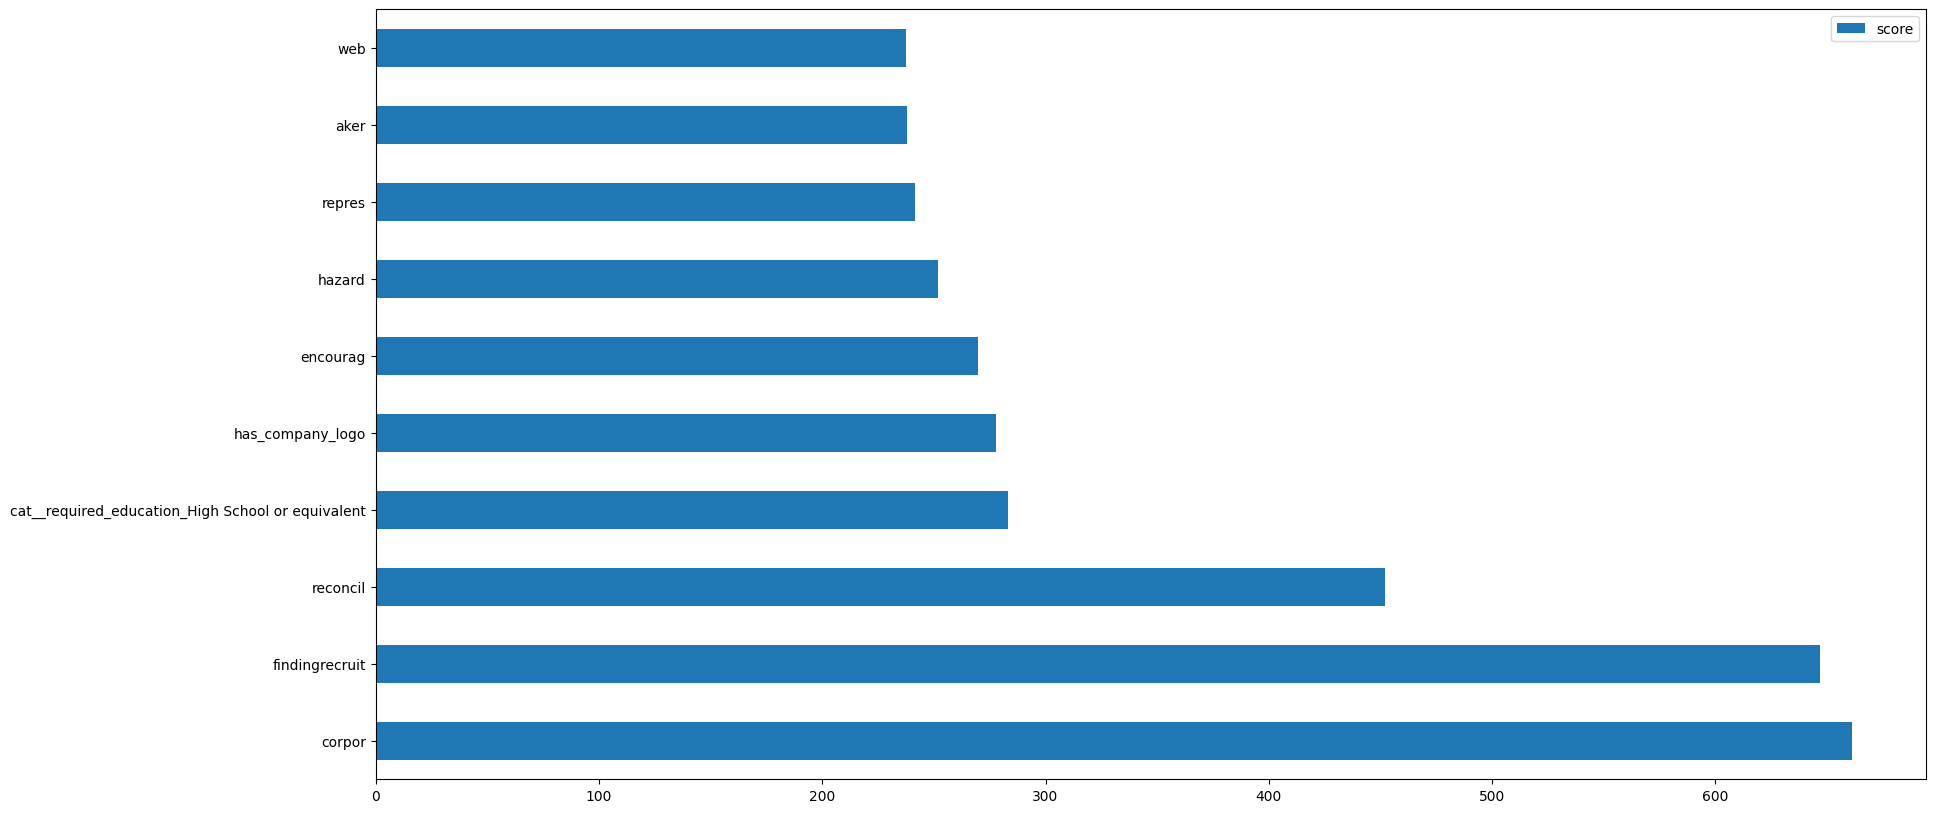

In [49]:
feature_important = model_over.get_booster().get_score(importance_type='gain')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

## SVM

In [50]:
from sklearn.svm import LinearSVC

In [51]:
# Instantiate the linear SVM classifier
svm_model = LinearSVC(random_state=42, class_weight='balanced')

# Train the linear SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test.values)
y_proba_svm = svm_model.decision_function(X_test.values)

# Evaluate the linear SVM model
evaluate_model(y_test, y_pred_svm)
auc_roc = roc_auc_score(y_test, y_proba_svm)
print(f"AUC ROC: {auc_roc:.2f}")

AUC-PR: 0.12
G-Mean: 0.62
F2-Score: 0.39
Confusion Matrix:
[[2984  419]
 [  79   94]]
Precision: 0.18
Recall: 0.54
F1-Score: 0.27
Accuracy: 0.86
AUC ROC: 0.84


Liblinear failed to converge, increase the number of iterations.
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names


In [52]:
# Instantiate the linear SVM classifier
svm_model = LinearSVC(random_state=42)

# Train the linear SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test.values)
y_proba_svm = svm_model.decision_function(X_test.values)

# Evaluate the linear SVM model
evaluate_model(y_test, y_pred_svm)
auc_roc = roc_auc_score(y_test, y_proba_svm)
print(f"AUC ROC: {auc_roc:.2f}")

Liblinear failed to converge, increase the number of iterations.
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names


AUC-PR: 0.23
G-Mean: 0.38
F2-Score: 0.27
Confusion Matrix:
[[3394    9]
 [ 133   40]]
Precision: 0.82
Recall: 0.23
F1-Score: 0.36
Accuracy: 0.96
AUC ROC: 0.88


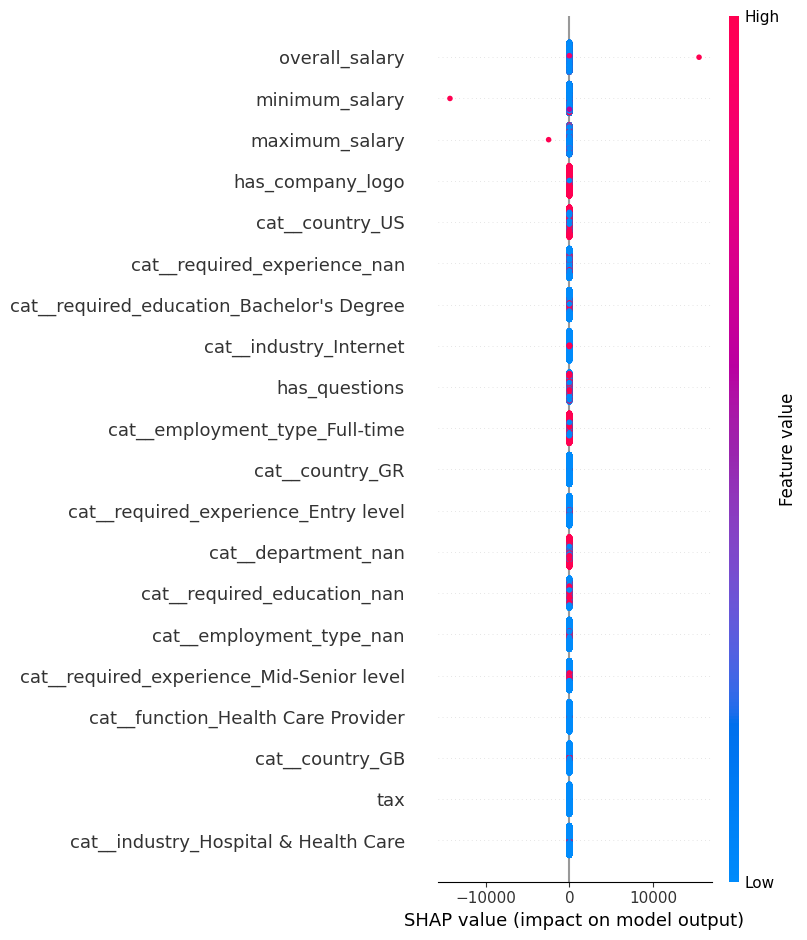

In [53]:
# Create a SHAP explainer
explainer = shap.Explainer(svm_model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

###Oversampling and Undersampling

In [54]:
svm_model_under = LinearSVC(random_state=42, class_weight='balanced')

svm_model_under.fit(X_resampled_under, y_resampled_under)

y_pred_svm_under = svm_model_under.predict(X_test.values)
y_proba_svm_under = svm_model_under.decision_function(X_test.values)

evaluate_model(y_test, y_pred_svm_under)
auc_roc = roc_auc_score(y_test, y_proba_svm_under)
print(f"AUC ROC: {auc_roc:.2f}")

AUC-PR: 0.16
G-Mean: 0.82
F2-Score: 0.48
Confusion Matrix:
[[2759  644]
 [  30  143]]
Precision: 0.18
Recall: 0.83
F1-Score: 0.30
Accuracy: 0.81
AUC ROC: 0.87


Liblinear failed to converge, increase the number of iterations.
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names


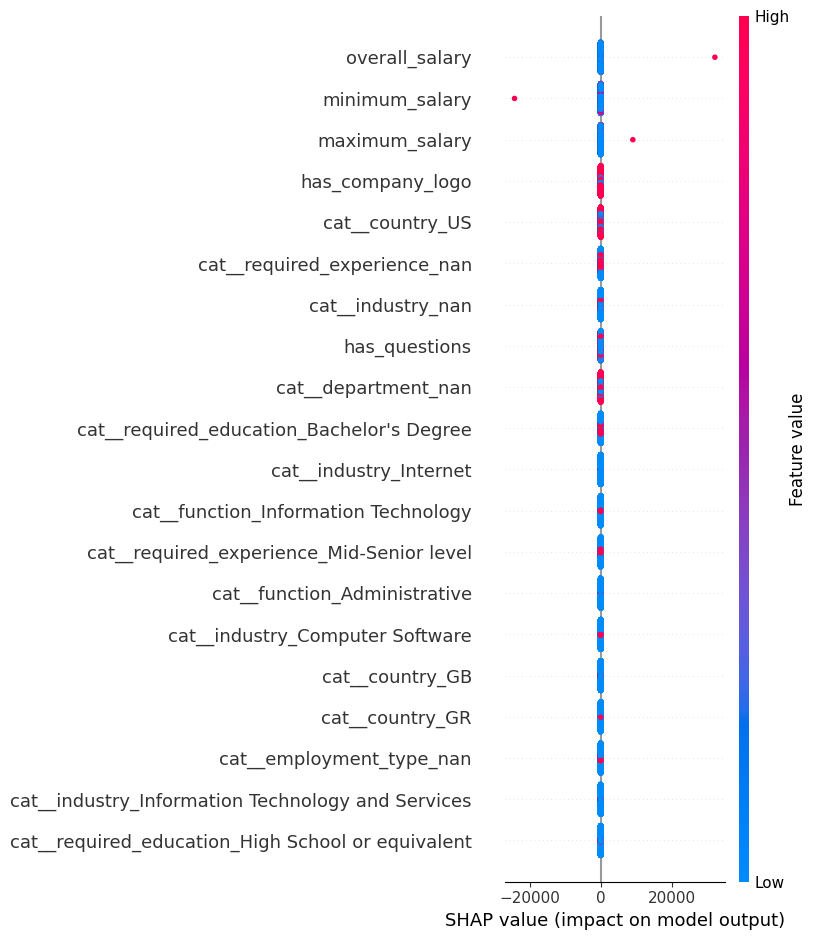

In [55]:
# Create a SHAP explainer
explainer = shap.Explainer(svm_model_under, X_resampled_under)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

In [56]:
svm_model_over = LinearSVC(random_state=42, class_weight='balanced')

svm_model_over.fit(X_resampled_over, y_resampled_over)

y_pred_svm_over = svm_model_over.predict(X_test.values)
y_proba_svm_over = svm_model_over.decision_function(X_test.values)

print("\nEvaluation on Oversampled Data:")
evaluate_model(y_test, y_pred_svm_over)
auc_roc = roc_auc_score(y_test, y_proba_svm_over)
print(f"AUC ROC: {auc_roc:.2f}")


Evaluation on Oversampled Data:
AUC-PR: 0.22
G-Mean: 0.47
F2-Score: 0.36
Confusion Matrix:
[[3359   44]
 [ 116   57]]
Precision: 0.56
Recall: 0.33
F1-Score: 0.42
Accuracy: 0.96
AUC ROC: 0.85


Liblinear failed to converge, increase the number of iterations.
X does not have valid feature names, but LinearSVC was fitted with feature names
X does not have valid feature names, but LinearSVC was fitted with feature names


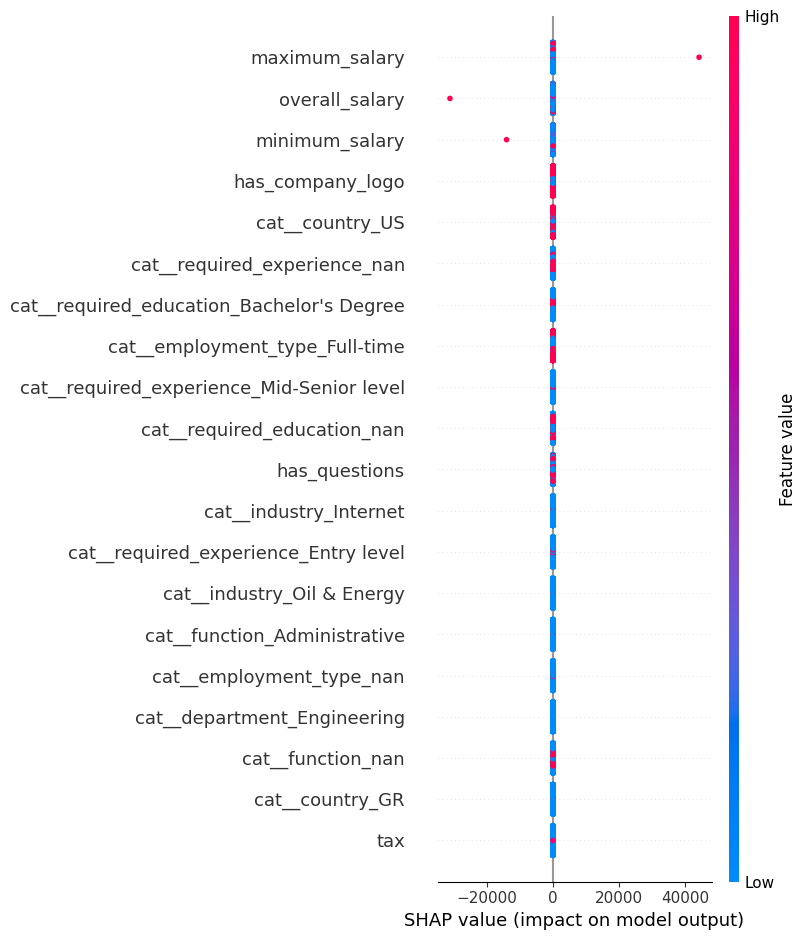

In [57]:
# Create a SHAP explainer
explainer = shap.Explainer(svm_model_over, X_resampled_over)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

## Multi-Layer Perceptron

In [58]:
!pip -q install scikeras

In [59]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

GPU device not found


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Convert Pandas DataFrames/Series to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
X_val_np = X_val.values
y_train_np = y_train.values
y_test_np = y_test.values
y_val_np = y_val.values

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function that creates the Keras model
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.01]
}

# Iterate over parameters manually
best_score = 0
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
            # Create model with specified parameters
            model = create_model(learning_rate=learning_rate)

            # Fit the model
            history = model.fit(X_train_np, y_train_np, epochs=epochs, batch_size=batch_size, validation_data=(X_val_np, y_val_np), verbose=0)

            # Evaluate on validation set
            score = model.evaluate(X_val_np, y_val_np, verbose=0)[1]

            # Check if this configuration is the best
            if score > best_score:
                best_score = score
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning_rate': learning_rate}

# Use the best parameters to train the final model
final_model = create_model(learning_rate=best_params['learning_rate'])
final_model.fit(X_train_np, y_train_np, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val_np, y_val_np), verbose=0)

# Evaluate the best model
y_pred = final_model.predict(X_test_np)

112/112 [==============================] - 0s 3ms/step


In [61]:
from sklearn.metrics import precision_recall_curve

# Convert probabilities to binary classes using a threshold
threshold = 0.5  # Adjust threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

print("0.5 threshold prediction")
evaluate_model(y_test_np, y_pred_binary)


precisions, recalls, thresholds = precision_recall_curve(y_test_np, y_pred)

# Calculate F2-score for different thresholds
def f2_score(precision, recall, beta=2):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

f2_scores = []
for i in range(len(thresholds)):
    y_pred_binary = (y_pred > thresholds[i]).astype(int)
    precision = precisions[i]
    recall = recalls[i]
    f2_scores.append(f2_score(precision, recall))

# Find the optimal threshold that maximizes F2-score
optimal_threshold = thresholds[np.argmax(f2_scores)]
print("Optimal Threshold:", optimal_threshold)

y_pred_optimal = (y_pred > threshold).astype(int)

evaluate_model(y_test_np, y_pred_optimal)

0.5 threshold prediction
AUC-PR: 0.05
G-Mean: 0.05
F2-Score: 0.01
Confusion Matrix:
[[3401    2]
 [ 172    1]]
Precision: 0.33
Recall: 0.01
F1-Score: 0.01
Accuracy: 0.95
Optimal Threshold: 1.0
AUC-PR: 0.05
G-Mean: 0.05
F2-Score: 0.01
Confusion Matrix:
[[3401    2]
 [ 172    1]]
Precision: 0.33
Recall: 0.01
F1-Score: 0.01
Accuracy: 0.95


invalid value encountered in double_scalars


###Oversampling and Undersampling

In [62]:
# Convert Pandas DataFrames/Series to NumPy arrays
X_train_np = X_resampled_under.values
X_test_np = X_test.values
X_val_np = X_val.values
y_train_np = y_resampled_under.values
y_test_np = y_test.values
y_val_np = y_val.values

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function that creates the Keras model
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.01]
}

# Iterate over parameters manually
best_score = 0
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
            # Create model with specified parameters
            model = create_model(learning_rate=learning_rate)

            # Fit the model
            history = model.fit(X_train_np, y_train_np, epochs=epochs, batch_size=batch_size, validation_data=(X_val_np, y_val_np), verbose=0)

            # Evaluate on validation set
            score = model.evaluate(X_val_np, y_val_np, verbose=0)[1]

            # Check if this configuration is the best
            if score > best_score:
                best_score = score
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning_rate': learning_rate}

# Use the best parameters to train the final model
final_model = create_model(learning_rate=best_params['learning_rate'])
final_model.fit(X_train_np, y_train_np, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val_np, y_val_np), verbose=0)

# Evaluate the best model
y_pred = final_model.predict(X_test_np)

112/112 [==============================] - 0s 3ms/step


In [63]:
from sklearn.metrics import precision_recall_curve

# Convert probabilities to binary classes using a threshold
threshold = 0.5  # Adjust threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

print("0.5 threshold prediction")
evaluate_model(y_test_np, y_pred_binary)


precisions, recalls, thresholds = precision_recall_curve(y_test_np, y_pred)

# Calculate F2-score for different thresholds
def f2_score(precision, recall, beta=2):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

f2_scores = []
for i in range(len(thresholds)):
    y_pred_binary = (y_pred > thresholds[i]).astype(int)
    precision = precisions[i]
    recall = recalls[i]
    f2_scores.append(f2_score(precision, recall))

# Find the optimal threshold that maximizes F2-score
optimal_threshold = thresholds[np.argmax(f2_scores)]
print("Optimal Threshold:", optimal_threshold)

y_pred_optimal = (y_pred > threshold).astype(int)

evaluate_model(y_test_np, y_pred_optimal)

0.5 threshold prediction
AUC-PR: 0.11
G-Mean: 0.68
F2-Score: 0.39
Confusion Matrix:
[[2779  624]
 [  62  111]]
Precision: 0.15
Recall: 0.64
F1-Score: 0.24
Accuracy: 0.81
Optimal Threshold: 0.4424563
AUC-PR: 0.11
G-Mean: 0.68
F2-Score: 0.39
Confusion Matrix:
[[2779  624]
 [  62  111]]
Precision: 0.15
Recall: 0.64
F1-Score: 0.24
Accuracy: 0.81


WARNING: BELOW MODEL EXCEEDS RAM LIMIT

In [ ]:
# Convert Pandas DataFrames/Series to NumPy arrays
X_train_np = X_resampled_over.values
X_test_np = X_test.values
X_val_np = X_val.values
y_train_np = y_resampled_over.values
y_test_np = y_test.values
y_val_np = y_val.values

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define a function that creates the Keras model
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.01]
}

# Iterate over parameters manually
best_score = 0
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        for learning_rate in param_grid['learning_rate']:
            # Create model with specified parameters
            model = create_model(learning_rate=learning_rate)

            # Fit the model
            history = model.fit(X_train_np, y_train_np, epochs=epochs, batch_size=batch_size, validation_data=(X_val_np, y_val_np), verbose=0)

            # Evaluate on validation set
            score = model.evaluate(X_val_np, y_val_np, verbose=0)[1]

            # Check if this configuration is the best
            if score > best_score:
                best_score = score
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning_rate': learning_rate}

# Use the best parameters to train the final model
final_model = create_model(learning_rate=best_params['learning_rate'])
final_model.fit(X_train_np, y_train_np, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val_np, y_val_np), verbose=0)

# Evaluate the best model
y_pred = final_model.predict(X_test_np)

In [ ]:
from sklearn.metrics import precision_recall_curve

# Convert probabilities to binary classes using a threshold
threshold = 0.5  # Adjust threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)

print("0.5 threshold prediction")
evaluate_model(y_test_np, y_pred_binary)


precisions, recalls, thresholds = precision_recall_curve(y_test_np, y_pred)

# Calculate F2-score for different thresholds
def f2_score(precision, recall, beta=2):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

f2_scores = []
for i in range(len(thresholds)):
    y_pred_binary = (y_pred > thresholds[i]).astype(int)
    precision = precisions[i]
    recall = recalls[i]
    f2_scores.append(f2_score(precision, recall))

# Find the optimal threshold that maximizes F2-score
optimal_threshold = thresholds[np.argmax(f2_scores)]
print("Optimal Threshold:", optimal_threshold)

y_pred_optimal = (y_pred > threshold).astype(int)

evaluate_model(y_test_np, y_pred_optimal)

In [ ]:
# # Create a SHAP explainer for the trained model
# explainer_mlp = shap.Explainer(final_model, X_train_np)
# shap_values_mlp = explainer_mlp.shap_values(X_test_np)

# # Plot the SHAP summary plot for feature importance
# shap.summary_plot(shap_values_mlp, X_test_np)